In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import binom, norm
import math
import random

# Gaussian Processes
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, RationalQuadratic, WhiteKernel

# Bayesian Stuff
import pymc as pm
import arviz as az

import seaborn as sns
sns.set_style('whitegrid')

In [ ]:
from copulas.multivariate import GaussianMultivariate
import numpy as np

# Define parameters for the marginal distributions
mean_registration_rate = 0.05
std_registration_rate = 0.01
mean_retirement_rate = 0.05
std_retirement_rate = 0.01

# Define the desired offset
desired_offset = 0.01

# Generate random samples for registration and retirement rates
num_samples = 10000
registration_rate_samples = np.random.normal(mean_registration_rate, std_registration_rate, num_samples)
retirement_rate_samples = np.random.normal(mean_retirement_rate, std_retirement_rate, num_samples)

In [ ]:
plt.hist(registration_rate_samples, bins=50)
plt.show()

In [ ]:
plt.hist(retirement_rate_samples, bins=50)
plt.show()

In [ ]:
plt.hist(registration_rate_samples - retirement_rate_samples, bins=50)
plt.show()

# Joint Distribution

In [ ]:
from scipy.stats import multivariate_normal

# Define parameters for the joint distribution

mean_reg = 0.05
std_reg = 0.01
mean_ret = 0.05
std_ret = 0.01
std_reg_ret = 0.008

# Calculate variances from standard deviations
var_reg = std_reg**2
var_ret = std_ret**2
cov_reg_ret = std_reg_ret**2

mu = np.array([mean_reg, mean_ret])  # Mean vector

cov_matrix = np.array([[var_reg, cov_reg_ret], [cov_reg_ret, var_ret]])  # Covariance matrix

c = 0.01  # Fixed difference

# Create a multivariate normal distribution object
mvn = multivariate_normal(mean=mu, cov=cov_matrix)

In [ ]:
x, y = np.mgrid[0:0.1:0.001, 0:0.1:0.001]
pos = np.dstack((x, y))
fig = plt.figure()
ax = fig.add_subplot(111)
ax.contourf(x, y, mvn.pdf(pos))

In [ ]:
import numpy as np
from scipy.stats import norm

# Given values
mean_rv = 0.05
std_rv = 0.01
mean_rr = 0.05
std_rr = 0.01
known_difference = 0.01

# Calculate standard deviation of the difference
std_difference = np.sqrt(2) * std_rv

# Conditional distribution of the difference (D)
distribution_d = norm(loc=known_difference, scale=std_difference)

# Calculate conditional distribution of RV
mean_cond_rv = mean_rv
std_cond_rv = np.sqrt(std_rv**2 - (std_difference / np.sqrt(2))**2)
distribution_cond_rv = norm(loc=mean_cond_rv, scale=std_cond_rv)

# Calculate conditional distribution of RR
mean_cond_rr = mean_rr - known_difference
std_cond_rr = std_rr
distribution_cond_rr = norm(loc=mean_cond_rr, scale=std_cond_rr)

# Calculate probabilities
condition = 0.01
prob_rv_given_condition = distribution_cond_rv.pdf(condition)
prob_rr_given_condition = distribution_cond_rr.pdf(condition)

print("Conditional Probability of RV given D = 0.01:", prob_rv_given_condition)
print("Conditional Probability of RR given D = 0.01:", prob_rr_given_condition)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from copulas.multivariate import GaussianMultivariate

# Number of samples
num_samples = 1000

# Define the copula model
copula = GaussianMultivariate()
copula.fit(np.random.rand(num_samples, 2))  # Fitting the copula to data (uniform margins)

# Generate samples from the copula with uniform margins
u_samples = copula.sample(num_samples)

# Transform uniform samples to the original marginal distributions of X1 and X2
x1_samples = np.random.normal(size=num_samples)  # Example marginal distribution for X1
x2_samples = np.random.normal(size=num_samples)  # Example marginal distribution for X2

# Apply the condition X1 + X2 = c
c = 2.0
x1_given_c = x2_samples - c/2
x2_given_c = x1_samples + c/2

# Plot the conditional distributions
plt.scatter(x1_given_c, x2_given_c, alpha=0.5)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Conditional Distribution: X2 = X1 + {}'.format(c))
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
mean = 0.05
std_dev = 0.01
C = 0.02  # Example constant

# Define the range of values for X2
x2_range = np.linspace(0, 0.1, 1000)

# Calculate conditional distributions
x1_given_x2 = norm(loc=mean, scale=std_dev).pdf(x2_range - C)
x2_given_x1 = norm(loc=mean + C, scale=std_dev).pdf(x2_range)

# Plot the conditional distributions
plt.figure(figsize=(10, 6))
plt.plot(x2_range, x1_given_x2, label="P(X1|X2)")
plt.plot(x2_range, x2_given_x1, label="P(X2|X1)")
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.title('Conditional Probability Distributions')
plt.legend()
plt.grid()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
mean = 0.05
std_dev = 0.01
C = 0.02  # Example constant

# Define the range of values for X1 and X2
x_range = np.linspace(-0.1, 0.2, 1000)

# Calculate conditional distributions
x1_given_x2 = norm(loc=mean - C/2, scale=std_dev).pdf(x_range)
x2_given_x1 = norm(loc=mean + C/2, scale=std_dev).pdf(x_range)

# Plot the conditional distributions
plt.figure(figsize=(10, 6))
plt.plot(x_range, x1_given_x2, label="P(X1|X2)")
plt.plot(x_range, x2_given_x1, label="P(X2|X1)")
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.title('Conditional Probability Distributions')
plt.legend()
plt.grid()
plt.show()

In [ ]:
x1_given_x2

# Simplify!

Say we want n_vehicles to decrease by 20% over from 2023 to 2040.

Let's use GPs to Assess the different possible trajectories to get there...

I'm going to create some synthetic historical data for n_vehicles...

In [ ]:
n_vehicles_init = 1000 # Current Number of Vehicles in the system
past_years = 10
current_year = 2023
first_year = current_year - past_years
future_date = 2030
growth = 0.8

In [ ]:
historical_vehicles = np.random.normal(n_vehicles_init, n_vehicles_init/500, past_years)
historical_vehicles = pd.Series(index = np.arange(first_year, current_year+1), data = np.append(historical_vehicles, n_vehicles_init))
historical_vehicles[future_date] = historical_vehicles[current_year]*growth
plt.plot(historical_vehicles)

In [ ]:
def train_stock_gp(df, current_year, future_date):

    """
    Trains a Gaussian Process Regressor model.

    Parameters:
    df (DataFrame): The input data containing market share values over time.
    ban_date (int): The year from which certain vehicles are banned (assumed as start of projection).

    Returns:
    gaussian_process (GaussianProcessRegressor): A trained Gaussian Process Regressor model.
    """

    # Combine historical data up to t_max with post-ban dates
    dates = np.append(df.loc[:current_year].index.values, future_date)

    # Prepare training data
    X_train = dates.reshape(-1, 1)
    y_train = df.loc[dates].values.reshape(-1, 1)

    # Define the kernel (you can adjust kernel parameters)
    k1 = 1 * RBF(length_scale=100, length_scale_bounds=(1e-6, 1e3))

    k3 = WhiteKernel(noise_level=1e-5, noise_level_bounds=(1e-10, 1e+1))
    # k3 = WhiteKernel(noise_level=0.02, noise_level_bounds='fixed')

    kernel = k1 + k3

    # Create GaussianProcessRegressor with defined kernel
    gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=100, normalize_y=True)

    # Fit the Gaussian process to the training data
    gaussian_process.fit(X_train, y_train)

    # Return the trained Gaussian Process Regressor model
    return gaussian_process

In [ ]:
def plot_stock_gp(gp, first_year, future_date, data_x, data_y, title):

    X = np.arange(first_year, future_date+1, 0.1).reshape(-1,1)

    mean_stock_prediction, std_prediction = gp.predict(X, return_std=True)
    # mean_stock_prediction = mean_stock_prediction + df.loc[t_max:horizon+1].values # New line
    # mean_stock_prediction = mean_stock_prediction + custom_mean # New line

    plt.scatter(data_x, data_y, label='Historical Vehicles')
    plt.plot(X, mean_stock_prediction, label="Mean prediction", color='black')
    plt.fill_between(
        X.ravel(),
        mean_stock_prediction - 1.96 * std_prediction,
        mean_stock_prediction + 1.96 * std_prediction,
        alpha=0.5,
        color='green',
        label=r"95% confidence interval",
    )
    plt.fill_between(
        X.ravel(),
        mean_stock_prediction - 1 * std_prediction,
        mean_stock_prediction + 1 * std_prediction,
        alpha=0.7,
        color='green',
        label=r"68% confidence interval",
    )
    plt.legend()
    plt.xlabel("$x$")
    plt.ylabel("$f(x)$")
    plt.title(title)

In [ ]:
historical_vehicles_gp = train_stock_gp(historical_vehicles, current_year, future_date)

In [ ]:
plot_stock_gp(gp=historical_vehicles_gp, first_year=first_year, future_date=future_date, data_x=historical_vehicles.index.values, data_y=historical_vehicles.values.reshape(-1, 1), title='Gaussian Process Regression of Total Vehicles')

In [ ]:
X = np.arange(current_year, future_date+1, 1).reshape(-1,1)

mean_stock_prediction, std_prediction = historical_vehicles_gp.predict(X, return_std=True)

mean_stock_prediction

How does the projected number of vehicle change each year?

In [ ]:
np.diff(mean_stock_prediction, n=1)

This change is caused by differences in vehicle registration and retirement rates: 

$$ r_{reg}^{t} n_{t} - r_{ret}^{t} n_{t} = n_{t} - n_{t+1} $$

$$ r_{reg}^{t} - r_{ret}^{t} = \frac{n_{t} - n_{t+1}}{n_{t}} $$

$$ r_{reg}^{t} = r_{ret}^{t} + \frac{n_{t} - n_{t+1}}{n_{t}} $$

$$ r_{ret}^{t} = r_{reg}^{t} - \frac{n_{t} - n_{t+1}}{n_{t}} $$

In [ ]:
np.diff(mean_stock_prediction, n=1)/mean_stock_prediction[:-1]

In [ ]:
np.arange(current_year, future_date, 1)

In [ ]:
plt.scatter(np.arange(current_year, future_date, 1), np.diff(mean_stock_prediction, n=1)/mean_stock_prediction[:-1])

What are the limits of $r_{reg}$ and $r_{ret}$? How might they be distributed?

Let's first assume that $r_{ret}$ is fixed at 0.05

In [ ]:
r_ret = 0.05
r_reg = r_ret + np.diff(mean_stock_prediction, n=1)/mean_stock_prediction[:-1]

plt.scatter(np.arange(current_year, future_date, 1), r_reg, label='r_reg')
plt.scatter(np.arange(current_year, future_date, 1), np.repeat(r_ret, future_date-current_year), label='r_ret')
plt.legend()
plt.show()

What if $r_{reg}$ is fixed at 0.05?

In [ ]:
r_reg = 0.05
r_ret = r_reg - np.diff(mean_stock_prediction, n=1)/mean_stock_prediction[:-1]

plt.scatter(np.arange(current_year, future_date, 1), np.repeat(r_reg, future_date-current_year), label='r_reg')
plt.scatter(np.arange(current_year, future_date, 1), r_ret, label='r_ret')
plt.legend()
plt.show()

I want some sort of slider to determine the driving factor behind the change in the number of vehicles.

In [ ]:
w = 0.5 # Weight to registrations (1 = Change in n_vehicles due to registration change, 0 = retirement change)

r_reg_init = r_ret_init = 0.05

r_reg = np.repeat(r_reg_init, future_date-current_year) + w * np.diff(mean_stock_prediction, n=1)/mean_stock_prediction[:-1]
r_ret = np.repeat(r_ret_init, future_date-current_year) - (1-w) * np.diff(mean_stock_prediction, n=1)/mean_stock_prediction[:-1]

plt.scatter(np.arange(current_year, future_date, 1), r_reg, label='r_reg')
plt.scatter(np.arange(current_year, future_date, 1), r_ret, label='r_ret')
plt.legend()
plt.show()

Adding some normally distributed noise to r_reg

In [ ]:
w = 0.8 # Weight to registrations (1 = Change in n_vehicles due to registration change, 0 = retirement change)

r_reg_init = r_ret_init = 0.05
std_reg = 0.005
r_reg_baseline = np.random.normal(r_reg_init, std_reg, future_date-current_year)

difference = np.diff(mean_stock_prediction, n=1)/mean_stock_prediction[:-1]

r_reg = r_reg_baseline + w * difference
r_ret = r_reg_baseline - (1-w) * difference

plt.scatter(np.arange(current_year, future_date, 1), r_reg, label='r_reg')
plt.scatter(np.arange(current_year, future_date, 1), r_ret, label='r_ret')
plt.legend()
plt.show()

In [ ]:
n_reg = r_reg*mean_stock_prediction[:-1]
n_ret = r_ret*mean_stock_prediction[:-1]

plt.scatter(np.arange(current_year, future_date, 1), n_reg, label='r_reg')
plt.scatter(np.arange(current_year, future_date, 1), n_ret, label='r_ret')
plt.legend()
plt.ylabel('Vehicle Registrations/Retirements each Year')
plt.show()

Simulate some tragectories

In [ ]:
n_vehicles = np.zeros(future_date-current_year+1)
n_vehicles[0] = n_vehicles_init
for i in range(1, future_date-current_year+1):
    n_vehicles[i] = n_vehicles[i-1] + n_reg[i-1] - n_ret[i-1]

plt.scatter(np.arange(current_year, future_date+1, 1), n_vehicles)
plt.ylim(0.9*min(n_vehicles), 1.1*max(n_vehicles))

# Applying this approach to Norway Data

## Read in Norwegian Data

In [2]:
df = pd.read_csv('../../data/vehicle_data/norway_vehicle_registrations.csv').dropna().set_index('Year', drop=False)
df['Year_Datetime'] = pd.to_datetime(df['Year'].astype(str), format='%Y')
df['Total_Stock'] = df['EV_Fleet'] + df['ICEV_Stock']
df

,Year,BEV_Stock,PHEV_Stock,EV_Fleet,ICEV_Stock,Total_Stock,BEV_Stock_Share_Total,PHEV_Stock_Share_Total,EV_Stock_Share_Total,ICEV_Stock_Share_Total,...,EV_New_Registrations,ICEV_New_Registrations,Total_New_Registrations,BEV_Market_Share_New_Registrations,BEV_Market_Share_New_EV_Registrations,PHEV_Market_Share_New_Registrations,PHEV_Market_Share_New_EV_Registrations,EV_Market_Share_New_Registrations,ICEV_Market_Share_New_Registrations,Year_Datetime
Year,,,,,,,,,,,,,,,,,,,,,
2009,2009,1388,0,1388,2311945.0,2313333.0,0.0006,0.0000,0.0006,0.9994,...,145,131673.0,131818.0,0.0011,1.000000,0.0000,0.000000,0.0011,0.9989,2009-01-01
2010,2010,1782,0,1782,2225718.0,2227500.0,0.0008,0.0000,0.0008,0.9992,...,380,126287.0,126667.0,0.0030,1.000000,0.0000,0.000000,0.0030,0.9970,2010-01-01
2011,2011,3982,1,3983,2338370.0,2342353.0,0.0017,0.0000,0.0017,0.9983,...,2010,136542.0,138552.0,0.0145,0.999502,0.0000,0.000498,0.0145,0.9855,2011-01-01
2012,2012,6543,341,6884,2416449.0,2423333.0,0.0027,0.0001,0.0028,0.9972,...,4596,133586.0,138182.0,0.0308,0.926023,0.0025,0.073977,0.0333,0.9667,2012-01-01
2013,2013,18000,3034,21034,2478966.0,2500000.0,0.0072,0.0012,0.0084,0.9916,...,8364,141636.0,150000.0,0.0525,0.941535,0.0033,0.058465,0.0558,0.9442,2013-01-01
2014,2014,39000,7106,46106,2502914.0,2549020.0,0.0153,0.0028,0.0181,0.9819,...,19697,130295.0,149992.0,0.1200,0.913794,0.0113,0.086206,0.1313,0.8687,2014-01-01
2015,2015,69000,33455,102455,2511181.0,2613636.0,0.0264,0.0128,0.0392,0.9608,...,33408,125195.0,158603.0,0.1611,0.764817,0.0495,0.235183,0.2106,0.7894,2015-01-01
2016,2016,97532,34514,132046,2532763.0,2664809.0,0.0366,0.0130,0.0496,0.9504,...,44530,115833.0,160363.0,0.1489,0.536223,0.1287,0.463777,0.2776,0.7224,2016-01-01
2017,2017,138983,67317,206300,2513524.0,2719824.0,0.0511,0.0248,0.0759,0.9241,...,61980,105722.0,167702.0,0.1958,0.529784,0.1738,0.470216,0.3696,0.6304,2017-01-01


## "Global Variables"

In [190]:
t_max = 2016

future_date = 2030

horizon = 2040

icev_ban = 2025
phev_ban = 2025

RANDOM_SEED = 42

n_sim = 1000

## Train GPs for Sales Share Projection

In [191]:
def train_sales_share_gp(df, ban_date):

    """
    Trains a Gaussian Process Regressor model.

    Parameters:
    df (DataFrame): The input data containing market share values over time.
    ban_date (int): The year from which certain vehicles are banned (assumed as start of projection).

    Returns:
    gaussian_process (GaussianProcessRegressor): A trained Gaussian Process Regressor model.
    """

    # Create an array of post-ban dates
    post_ban_dates = np.arange(ban_date, horizon+1)

    # Combine historical data up to t_max with post-ban dates
    dates = np.append(df.loc[:t_max].index.values, [ban_date])

    # Prepare training data
    X_train = dates.reshape(-1, 1)
    y_train = df.loc[dates].values.reshape(-1, 1)

    # Define the kernel (you can adjust kernel parameters)
    k1 = 1 * RBF(length_scale=100, length_scale_bounds=(1e-5, 1e3))
    # k2 = 1 * RationalQuadratic(alpha=10, length_scale=1, alpha_bounds=(1e-5, 1e20))
    k2 = 1 * RBF(length_scale=1, length_scale_bounds=(1e-5, 1e3))
    
    k3 = WhiteKernel(noise_level=1e-5, noise_level_bounds=(1e-12, 1e+1))

    kernel = k1 + k2 + k3

    # Create GaussianProcessRegressor with defined kernel
    gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=100, normalize_y=True)

    # Fit the Gaussian process to the training data
    gaussian_process.fit(X_train, y_train)

    # Return the trained Gaussian Process Regressor model
    return gaussian_process

In [192]:
def project_sales_share(df, ban, value_at_ban):
    
    date_range = np.arange(df.index.values[0], horizon+1) # Current and Future Dates
    df = df.reindex(date_range)

    # Linear Interpolation
    df.loc[ban:] = value_at_ban # 0 if banned vehicle type, 1 if beneficiary.
    return df

In [193]:
def plot_sales_share_gp(gp, data_x, data_y, title):

    X = np.arange(2009, horizon+1, 0.1).reshape(-1,1)

    mean_stock_prediction, std_prediction = gp.predict(X, return_std=True)
    
    plt.fill_between(
        X.ravel(),
        mean_stock_prediction - 2.576 * std_prediction,
        mean_stock_prediction + 2.576 * std_prediction,
        alpha=0.1,
        color='green',
        label=r"99% confidence interval",
    )
    plt.fill_between(
        X.ravel(),
        mean_stock_prediction - 1.96 * std_prediction,
        mean_stock_prediction + 1.96 * std_prediction,
        alpha=0.3,
        color='green',
        label=r"95% confidence interval",
    )
    plt.fill_between(
        X.ravel(),
        mean_stock_prediction - 1 * std_prediction,
        mean_stock_prediction + 1 * std_prediction,
        alpha=0.5,
        color='green',
        label=r"68% confidence interval",
    )

    plt.scatter(data_x[:t_max+1-2009], data_y[:t_max+1-2009], label='Historical Sales Share (Seen)')
    plt.scatter(data_x[t_max+1-2009:], data_y[t_max+1-2009:], label='Historical Sales Share (Unseen)', color='purple')
    plt.plot(X, mean_stock_prediction, label="Mean prediction", color='black')

    plt.legend()
    plt.xlabel("$x$")
    plt.ylabel("$f(x)$")
    plt.title(title)
    plt.show()

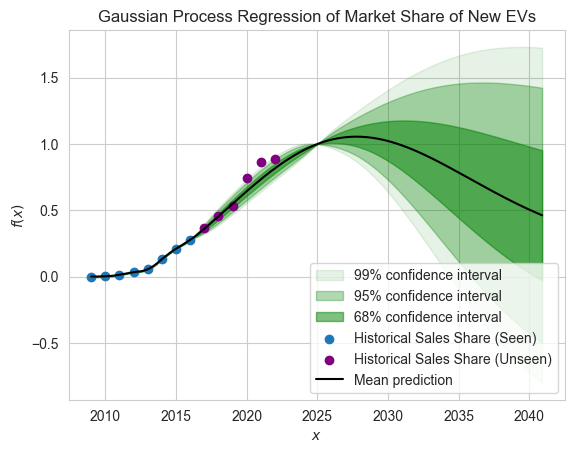

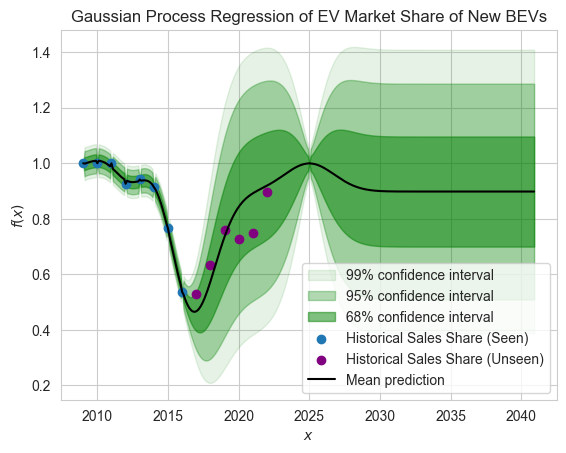

In [194]:
ev_sales_share = project_sales_share(df.loc[:t_max, 'EV_Market_Share_New_Registrations'], icev_ban, 1)
bev_sales_share = project_sales_share(df.loc[:t_max, 'BEV_Market_Share_New_EV_Registrations'], phev_ban, 1)

ev_share_gp = train_sales_share_gp(ev_sales_share, icev_ban)
bev_share_gp = train_sales_share_gp(bev_sales_share, phev_ban)

plot_sales_share_gp(
    ev_share_gp, 
    df.index.values, 
    df['EV_Market_Share_New_Registrations'].values.reshape(-1, 1), 
    'Gaussian Process Regression of Market Share of New EVs'
)

plot_sales_share_gp(
    bev_share_gp, 
    df.index.values, 
    df['BEV_Market_Share_New_EV_Registrations'].values.reshape(-1, 1), 
    'Gaussian Process Regression of EV Market Share of New BEVs'
)

### Truncating and Sampling from GPs

In [195]:
def truncate_and_sample_gp(gaussian_process, n_sim):

    X = np.arange(t_max, horizon + 1).reshape(-1,1)
    
    mean_stock_prediction, std_prediction = gaussian_process.predict(X, return_std=True)
    # mean_stock_prediction = mean_stock_prediction + custom_mean # New line

    a = - mean_stock_prediction/std_prediction # Lower Limit for Projections. The multiples of std can't go lower than this!
    b = (1 - mean_stock_prediction)/std_prediction # Upper Limit for Projections. The multiples of std can't go higher than this!

    gp_truncated = np.zeros([len(X), n_sim])
    
    for i in range(0, len(X)):
        gp_truncated[i] = mean_stock_prediction[i] + std_prediction[i]*np.sort(stats.truncnorm.ppf(np.random.rand(n_sim), a[i], b[i])) # Percentile Point Function
    
    gp_truncated_df = pd.DataFrame(index=np.arange(t_max, horizon + 1), columns=range(0, n_sim), data=gp_truncated)

    gp_truncated_df.loc[icev_ban:] = 1
    
    return gp_truncated_df

<Axes: >

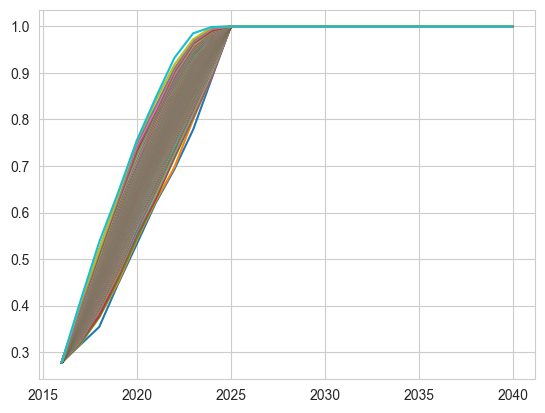

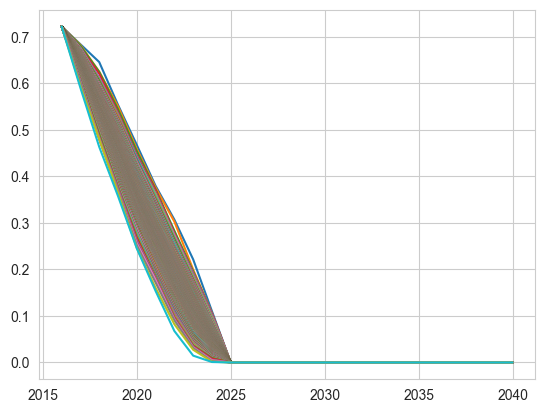

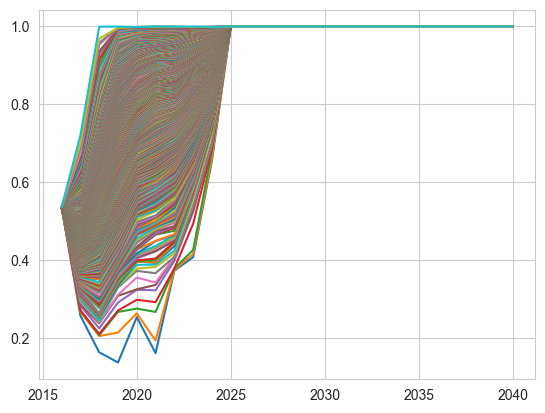

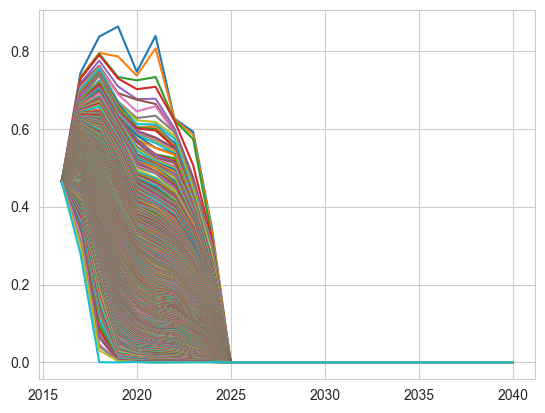

In [196]:
ev_share_gp_samples = truncate_and_sample_gp(ev_share_gp, n_sim)
bev_share_gp_samples = truncate_and_sample_gp(bev_share_gp, n_sim)

icev_share_gp_samples = 1 - ev_share_gp_samples
phev_share_gp_samples = 1 - bev_share_gp_samples

ev_share_gp_samples.plot(legend=False)
icev_share_gp_samples.plot(legend=False)
bev_share_gp_samples.plot(legend=False)
phev_share_gp_samples.plot(legend=False)

## New registrations

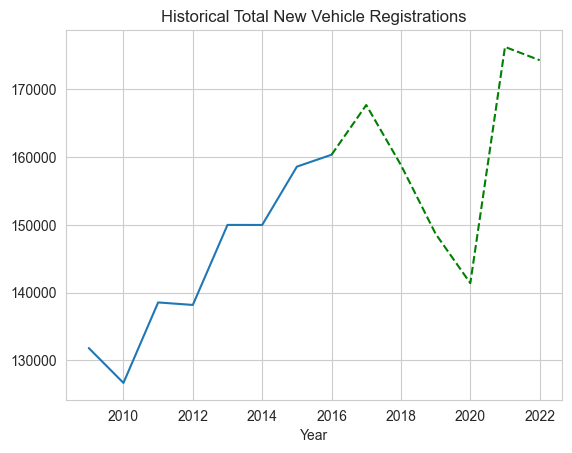

In [197]:
fig, ax = plt.subplots()
df.loc[:t_max, 'Total_New_Registrations'].plot(ax=ax, label='Historical Train')
df.loc[t_max:, 'Total_New_Registrations'].plot(ax=ax, color='green', linestyle='--', label='Historical Test')
plt.title('Historical Total New Vehicle Registrations')
plt.show()

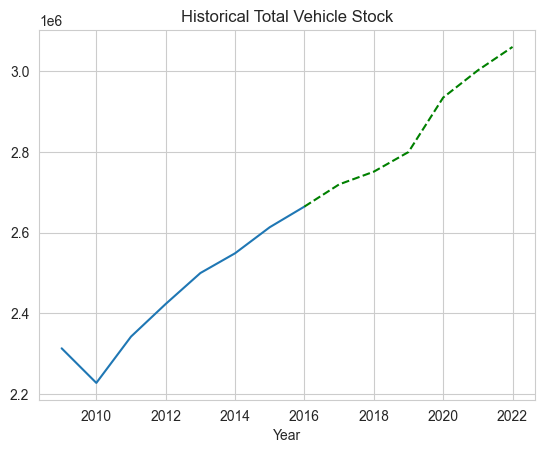

In [198]:
fig, ax = plt.subplots()
df.loc[:t_max, 'Total_Stock'].plot(ax=ax, label='Historical Train')
df.loc[t_max:, 'Total_Stock'].plot(ax=ax, color='green', linestyle='--', label='Historical Test')
plt.title('Historical Total Vehicle Stock')
plt.show()

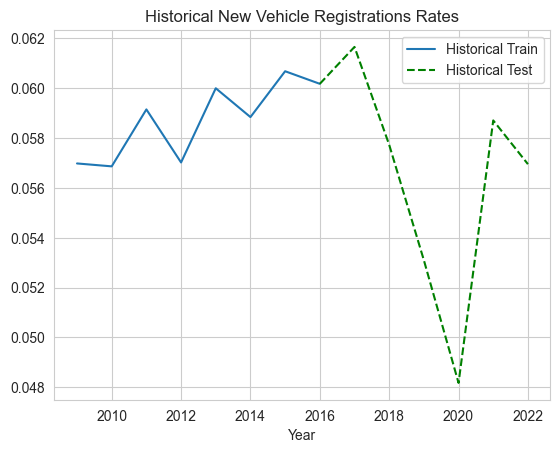

In [199]:
fig, ax = plt.subplots()

r_reg = df.loc[:t_max, 'Total_New_Registrations'] / df.loc[:t_max, 'Total_Stock']

r_reg.plot(ax=ax, label='Historical Train')
(df.loc[t_max:, 'Total_New_Registrations'] / df.loc[t_max:, 'Total_Stock']).plot(ax=ax, color='green', linestyle='--', label='Historical Test')
plt.legend()
plt.title('Historical New Vehicle Registrations Rates')
plt.show()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, sigma]


Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 1 seconds.


array([[<Axes: title={'center': 'mu'}>, <Axes: title={'center': 'mu'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>]], dtype=object)

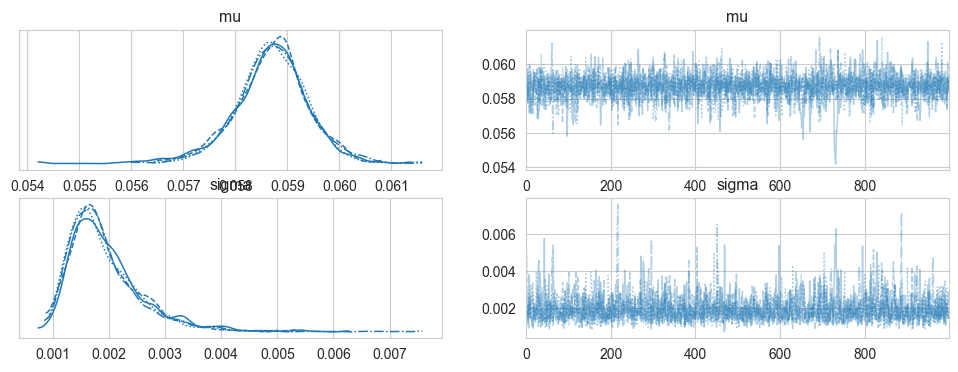

In [200]:
with pm.Model() as new_vehicle_model:
    # Priors for the parameters (need to remove reference to target_lsoa_data)
    mu = pm.Uniform('mu', lower=0, upper=0.5)  # Prior for the mean
    sigma = pm.Uniform('sigma', lower=0, upper=0.5)  # Prior for the standard deviation

    # Likelihood (sampling distribution) of the observed data
    counts_observed = pm.TruncatedNormal('counts_observed', mu=mu, sigma=sigma, lower=0, observed=r_reg)

with new_vehicle_model:
    trace = pm.sample(draws=1000, tune=2000, random_seed=RANDOM_SEED, progressbar=True)

az.plot_trace(trace)

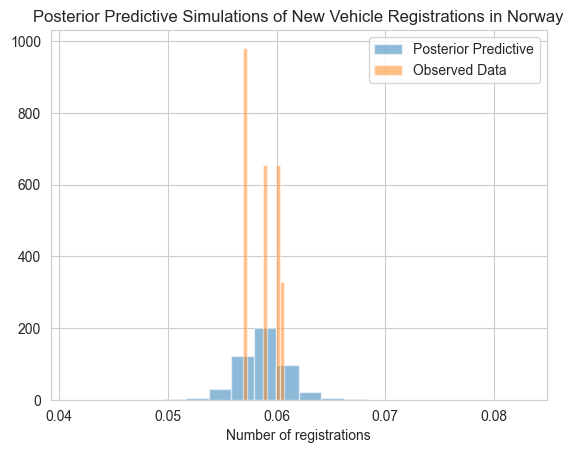

In [201]:
# Generate random samples from the posterior predictive distribution
with new_vehicle_model:
    posterior_predictive = pm.sample_posterior_predictive(trace)

# Plot the posterior predictive distribution
plt.hist(posterior_predictive.posterior_predictive.counts_observed.values.flatten(), bins=20, density=True, alpha=0.5, label='Posterior Predictive')
plt.hist(r_reg, bins=10, density=True, alpha=0.5, label='Observed Data')
plt.xlabel('Number of registrations')
plt.legend()
plt.title('Posterior Predictive Simulations of New Vehicle Registrations in Norway')
plt.show()

In [202]:
r_reg_baseline = np.random.choice(posterior_predictive.posterior_predictive.counts_observed.values.flatten(), size=(future_date-t_max, n_sim))
r_reg_baseline[0]

array([0.05871675, 0.05815087, 0.05717405, 0.05679819, 0.05857377,
       0.05923678, 0.05869697, 0.05688138, 0.06042895, 0.05631692,
       0.05354979, 0.05951146, 0.05851817, 0.05951901, 0.05945472,
       0.05786862, 0.05952302, 0.06112102, 0.0595183 , 0.05819078,
       0.06068282, 0.05883631, 0.05290156, 0.05657283, 0.0587389 ,
       0.06012769, 0.05667074, 0.05803339, 0.0574385 , 0.05537265,
       0.05681118, 0.0596881 , 0.05838076, 0.06054896, 0.05641273,
       0.06013529, 0.06025838, 0.05880716, 0.05737629, 0.06094487,
       0.05791368, 0.06177788, 0.06179657, 0.06150708, 0.05812262,
       0.0586494 , 0.06095646, 0.05674406, 0.05715946, 0.0561634 ,
       0.06126219, 0.06326214, 0.05938013, 0.05779333, 0.05944189,
       0.05703924, 0.05841374, 0.05880704, 0.05911344, 0.0572663 ,
       0.05955475, 0.05990361, 0.05963862, 0.05884132, 0.05722907,
       0.06119895, 0.05974675, 0.05613615, 0.05915607, 0.06112979,
       0.05904824, 0.05871335, 0.05947158, 0.0592925 , 0.05635

### Using ARIMA

In [203]:
df.loc[:t_max, 'Total_Stock'].mean()

2454248.0

In [204]:
# ARIMA
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model = ARIMA(endog = df.loc[:t_max, 'Total_New_Registrations'].values, dates=df.loc[:t_max, 'Year_Datetime'].values, order=(2, 1, 1))  # Probably need to tune these values
model_fit = model.fit()

# Forecast
forecast_steps = future_date-t_max-1  # Number of years to forecast

# Get forecast and associated confidence intervals
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
forecast_std = np.sqrt(forecast.var_pred_mean) # Standard deviations from the forecast

# Add values at time = t_max (Last bit of training data)
forecast_mean = np.insert(forecast_mean, obj=0, values=df.loc[t_max, 'Total_New_Registrations'])
forecast_std = np.insert(forecast_std, obj=0, values=0)

# Sample possible values for each forecasted year
new_vehicles_samples = []

for mean, std in zip(forecast_mean, forecast_std):
    # Sample random errors from a normal distribution based on forecast std
    random_errors = np.random.normal(loc=0, scale=std, size=n_sim)
    
    # Generate sampled values by adding random errors to the forecasted mean
    sampled_year_values = mean + random_errors
    
    # Append sampled values to the list
    new_vehicles_samples.append(sampled_year_values)

# Convert sampled values list to a numpy array
new_vehicles_samples = np.array(new_vehicles_samples)

new_vehicles_samples_df = pd.DataFrame(index=np.arange(t_max, future_date), columns=range(0, n_sim), data=new_vehicles_samples)

r_reg_baseline_df = new_vehicles_samples_df/df.loc[:t_max, 'Total_Stock'].mean()

r_reg_baseline_df.values.sort(axis=1)

r_reg_baseline_df

/Users/isaacflower/miniconda3/envs/probabilistic_ev_demand_modelling/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/isaacflower/miniconda3/envs/probabilistic_ev_demand_modelling/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/isaacflower/miniconda3/envs/probabilistic_ev_demand_modelling/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2016,0.065341,0.065341,0.065341,0.065341,0.065341,0.065341,0.065341,0.065341,0.065341,0.065341,...,0.065341,0.065341,0.065341,0.065341,0.065341,0.065341,0.065341,0.065341,0.065341,0.065341
2017,0.060676,0.060713,0.061166,0.061807,0.061871,0.062005,0.062038,0.062090,0.062164,0.062166,...,0.070271,0.070278,0.070471,0.070558,0.070590,0.070620,0.070853,0.071220,0.071278,0.071862
2018,0.060092,0.060725,0.060933,0.061135,0.061382,0.061419,0.061545,0.061586,0.062099,0.062101,...,0.073246,0.073260,0.073462,0.073528,0.073531,0.073538,0.073591,0.073672,0.073718,0.074018
2019,0.058299,0.059092,0.060130,0.060269,0.060644,0.060696,0.060933,0.061270,0.061472,0.061835,...,0.074748,0.074982,0.075442,0.075849,0.075963,0.075992,0.076022,0.076879,0.077195,0.078412
2020,0.057005,0.057623,0.058849,0.059160,0.059781,0.060196,0.060376,0.060987,0.061203,0.061265,...,0.077329,0.077405,0.077495,0.078129,0.078614,0.079058,0.079788,0.080559,0.082996,0.083106
2021,0.054725,0.058653,0.059390,0.060280,0.060354,0.060386,0.060455,0.060620,0.060706,0.060709,...,0.078814,0.078831,0.078886,0.078910,0.078959,0.079164,0.079975,0.079993,0.080133,0.080351
2022,0.058090,0.058366,0.058370,0.058894,0.058942,0.059411,0.060052,0.060173,0.060233,0.060422,...,0.079977,0.080190,0.080702,0.080946,0.081257,0.081354,0.081453,0.081746,0.081812,0.082555
2023,0.056149,0.056440,0.056552,0.058664,0.058754,0.058798,0.058962,0.059394,0.059536,0.059699,...,0.081574,0.081714,0.081716,0.082039,0.082657,0.082947,0.083197,0.083220,0.083466,0.083521
2024,0.051336,0.055298,0.056700,0.056899,0.057027,0.057361,0.057389,0.057403,0.057791,0.058421,...,0.082361,0.082415,0.082567,0.082758,0.082934,0.083094,0.083491,0.085941,0.086214,0.086292
2025,0.051987,0.054533,0.055303,0.056743,0.056841,0.057328,0.057581,0.057859,0.058122,0.058195,...,0.082947,0.083035,0.083444,0.084218,0.084290,0.084724,0.085518,0.085772,0.087018,0.087115


<Axes: >

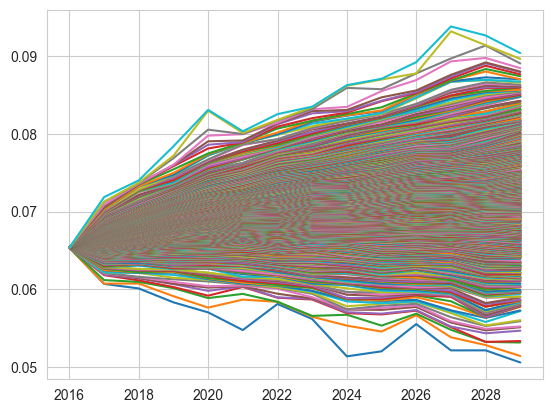

In [205]:
r_reg_baseline_df.plot(legend=False)

## Modelling Vehicle Stock

In [206]:
def train_stock_gp(df, current_year, future_date):

    """
    Trains a Gaussian Process Regressor model.

    Parameters:
    df (DataFrame): The input data containing market share values over time.
    ban_date (int): The year from which certain vehicles are banned (assumed as start of projection).

    Returns:
    gaussian_process (GaussianProcessRegressor): A trained Gaussian Process Regressor model.
    """

    # Combine historical data up to t_max with post-ban dates
    dates = np.append(df.loc[current_year-4:current_year].index.values, future_date) # Use previous 5 data points

    # Prepare training data
    X_train = dates.reshape(-1, 1)
    y_train = df.loc[dates].values.reshape(-1, 1)

    # Define the kernel (you can adjust kernel parameters)
    k1 = 1 * RBF(length_scale=10, length_scale_bounds=(1e-2, 1e3)) # Longer Trends

    k2 = 1 * RBF(length_scale=0.1, length_scale_bounds=(1e-5, 1e1)) # Shorter Trends

    k3 = WhiteKernel(noise_level=1e-5, noise_level_bounds=(1e-10, 1e+1))
    # k3 = WhiteKernel(noise_level=0.05, noise_level_bounds='fixed')

    kernel = k1 + k2 + k3

    # Create GaussianProcessRegressor with defined kernel
    gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=100, normalize_y=True)

    # Fit the Gaussian process to the training data
    gaussian_process.fit(X_train, y_train)

    # Return the trained Gaussian Process Regressor model
    return gaussian_process

In [207]:
def plot_stock_gp(gp, first_year, future_date, data_x, data_y, title):

    X = np.arange(first_year, future_date+1, 0.1).reshape(-1,1)

    mean_stock_prediction, std_prediction = gp.predict(X, return_std=True)
    # mean_stock_prediction = mean_stock_prediction + df.loc[t_max:horizon+1].values # New line
    # mean_stock_prediction = mean_stock_prediction + custom_mean # New line

    plt.scatter(data_x, data_y, label='Historical Vehicles')
    plt.plot(X, mean_stock_prediction, label="Mean prediction", color='black')
    plt.fill_between(
        X.ravel(),
        mean_stock_prediction - 1.96 * std_prediction,
        mean_stock_prediction + 1.96 * std_prediction,
        alpha=0.5,
        color='green',
        label=r"95% confidence interval",
    )
    plt.fill_between(
        X.ravel(),
        mean_stock_prediction - 1 * std_prediction,
        mean_stock_prediction + 1 * std_prediction,
        alpha=0.7,
        color='green',
        label=r"68% confidence interval",
    )
    plt.legend()
    plt.xlabel("$x$")
    plt.ylabel("$f(x)$")
    plt.title(title)

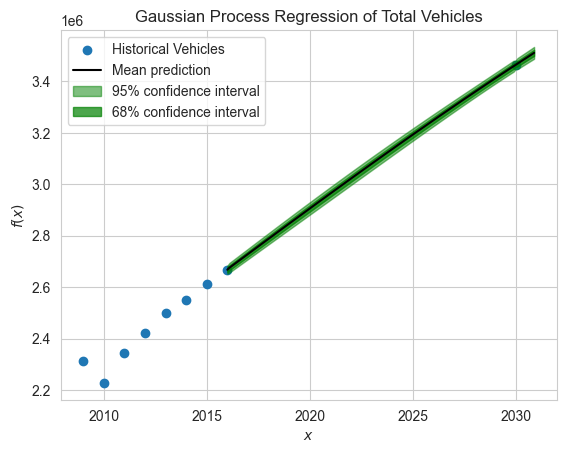

In [208]:
growth = 1.3 # The relative size of the vehicle stock at some future date

historical_vehicles = df.loc[:t_max, 'Total_Stock']
historical_vehicles[future_date] = historical_vehicles[t_max]*growth

historical_vehicles_gp = train_stock_gp(
    historical_vehicles, 
    t_max, 
    future_date
)

plot_stock_gp(
    gp=historical_vehicles_gp, 
    first_year = t_max, 
    future_date = future_date, 
    data_x=historical_vehicles.index.values, 
    data_y=historical_vehicles.values.reshape(-1, 1), 
    title='Gaussian Process Regression of Total Vehicles',
)

In [209]:
X = np.arange(t_max, future_date+1, 1).reshape(-1,1)

stock_prediction_df = pd.DataFrame(
    index=np.arange(t_max, future_date+1), 
    columns=range(0, n_sim), 
    data=historical_vehicles_gp.sample_y(X, n_samples=n_sim)
)
stock_prediction_df

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2016,2.658676e+06,2.661014e+06,2.674823e+06,2.667181e+06,2.665823e+06,2.660753e+06,2.679699e+06,2.657226e+06,2.669057e+06,2.668250e+06,...,2.654954e+06,2.658097e+06,2.667114e+06,2.664958e+06,2.674178e+06,2.675136e+06,2.671309e+06,2.680875e+06,2.660018e+06,2.665831e+06
2017,2.717159e+06,2.734293e+06,2.724695e+06,2.717030e+06,2.728220e+06,2.732877e+06,2.737154e+06,2.725174e+06,2.728018e+06,2.732396e+06,...,2.721695e+06,2.738318e+06,2.732727e+06,2.728078e+06,2.719841e+06,2.714256e+06,2.746518e+06,2.730430e+06,2.719036e+06,2.728002e+06
2018,2.779715e+06,2.785738e+06,2.782998e+06,2.785583e+06,2.795625e+06,2.794677e+06,2.790428e+06,2.779223e+06,2.779134e+06,2.776815e+06,...,2.793528e+06,2.799208e+06,2.790442e+06,2.792606e+06,2.779314e+06,2.790316e+06,2.790871e+06,2.757843e+06,2.784918e+06,2.778955e+06
2019,2.833495e+06,2.864459e+06,2.855522e+06,2.846063e+06,2.855449e+06,2.847958e+06,2.845716e+06,2.822190e+06,2.841599e+06,2.846191e+06,...,2.836743e+06,2.854941e+06,2.848771e+06,2.842782e+06,2.845526e+06,2.843432e+06,2.867057e+06,2.840112e+06,2.839164e+06,2.834888e+06
2020,2.886417e+06,2.902357e+06,2.914456e+06,2.912287e+06,2.917979e+06,2.924774e+06,2.926475e+06,2.884559e+06,2.892636e+06,2.902633e+06,...,2.906992e+06,2.911757e+06,2.909974e+06,2.895906e+06,2.905744e+06,2.896277e+06,2.927170e+06,2.892523e+06,2.891726e+06,2.897551e+06
2021,2.937620e+06,2.948881e+06,2.958450e+06,2.970107e+06,2.975216e+06,2.958747e+06,2.959302e+06,2.944479e+06,2.942341e+06,2.953199e+06,...,2.972056e+06,2.966006e+06,2.965014e+06,2.961596e+06,2.961466e+06,2.969699e+06,2.975705e+06,2.937605e+06,2.948128e+06,2.953879e+06
2022,3.001727e+06,3.025120e+06,3.026737e+06,3.026824e+06,3.023194e+06,3.031345e+06,3.021777e+06,2.999442e+06,3.020250e+06,3.005574e+06,...,3.023755e+06,3.031641e+06,3.023536e+06,3.015417e+06,3.020068e+06,3.013623e+06,3.041113e+06,3.008090e+06,3.009594e+06,3.016973e+06
2023,3.053669e+06,3.075866e+06,3.074751e+06,3.077613e+06,3.088375e+06,3.078245e+06,3.092373e+06,3.056087e+06,3.085390e+06,3.079120e+06,...,3.084892e+06,3.075749e+06,3.084025e+06,3.082873e+06,3.066616e+06,3.088249e+06,3.082520e+06,3.060010e+06,3.080654e+06,3.056735e+06
2024,3.120168e+06,3.135265e+06,3.142246e+06,3.143624e+06,3.132408e+06,3.135577e+06,3.137939e+06,3.111127e+06,3.134080e+06,3.125801e+06,...,3.138642e+06,3.142261e+06,3.144247e+06,3.120858e+06,3.122378e+06,3.133239e+06,3.151113e+06,3.122336e+06,3.112983e+06,3.120670e+06
2025,3.178127e+06,3.197977e+06,3.185100e+06,3.203505e+06,3.204026e+06,3.206092e+06,3.198909e+06,3.157649e+06,3.191828e+06,3.189319e+06,...,3.194980e+06,3.197851e+06,3.195986e+06,3.187593e+06,3.181579e+06,3.195705e+06,3.200050e+06,3.176447e+06,3.190780e+06,3.174056e+06


<Axes: >

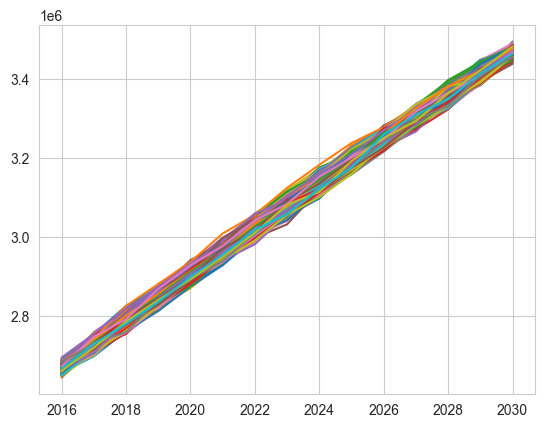

In [210]:
stock_prediction_df.plot(legend=False)

In [211]:
# w=0.9
w = np.random.rand(n_sim) # Use random weights instead of deterministic ones

difference_df = stock_prediction_df.diff(1).shift(-1).div(stock_prediction_df).head(-1)

# r_reg_df = pd.DataFrame(index=np.arange(t_max, future_date), columns=range(0, n_sim), data=r_reg_baseline)
# r_ret_df = pd.DataFrame(index=np.arange(t_max, future_date), columns=range(0, n_sim), data=r_reg_baseline)

r_reg_df  = r_reg_baseline_df
r_ret_df  = r_reg_baseline_df

r_ret_df = r_reg_df.sub((1-w)*difference_df, axis=0)
r_reg_df = r_reg_df.add(w*difference_df, axis=0)

# r_reg_df.values.sort(axis=1)
# r_ret_df.values.sort(axis=1)

In [212]:
# w = 0.8 # Weight to registrations (1 = Change in n_vehicles due to registration change, 0 = retirement change)

# X = np.arange(t_max, future_date+1, 1).reshape(-1,1)
# mean_stock_prediction, std_prediction = historical_vehicles_gp.predict(X, return_std=True)

# difference = np.diff(mean_stock_prediction, n=1)/mean_stock_prediction[:-1]

# r_reg_df = pd.DataFrame(index=np.arange(t_max, future_date), columns=range(0, n_sim), data=r_reg_baseline)
# r_ret_df = pd.DataFrame(index=np.arange(t_max, future_date), columns=range(0, n_sim), data=r_reg_baseline)

# r_ret_df = r_reg_df.sub((1-w)*difference, axis=0)
# r_reg_df = r_reg_df.add(w*difference, axis=0)

# r_reg_df.values.sort(axis=1)
# r_ret_df.values.sort(axis=1)

## Forecasting New Registrations for Different Vehicle Types

In [213]:
# Creates a range of numeric dates between t0 and t1 at a given sample rate
forecast_dates = np.arange(t_max, future_date+1)
forecast_dates

# Create dataframes that contain a column for each simulation and a row for each forecasted date
ev_forecast= pd.DataFrame(index=forecast_dates, columns=range(0, n_sim), dtype=float)
icev_forecast = pd.DataFrame(index=forecast_dates, columns=range(0, n_sim), dtype=float)
bev_forecast= pd.DataFrame(index=forecast_dates, columns=range(0, n_sim), dtype=float)
phev_forecast = pd.DataFrame(index=forecast_dates, columns=range(0, n_sim), dtype=float)

# Populate forecast with inital starting registrations
ev_forecast.iloc[0] = df.loc[t_max, 'EV_Fleet']
icev_forecast.iloc[0] = df.loc[t_max, 'ICEV_Stock']
bev_forecast.iloc[0] = df.loc[t_max, 'BEV_Stock']
phev_forecast.iloc[0] = df.loc[t_max, 'PHEV_Stock']

# Making the forecasts by adding new registrations and removing retired vehicles
for i in range(1, len(forecast_dates)):
    new_vehicles = r_reg_df.loc[forecast_dates[i-1]] * (ev_forecast.loc[forecast_dates[i-1]] + icev_forecast.loc[forecast_dates[i-1]])
    new_evs = ev_share_gp_samples.loc[forecast_dates[i-1]] * new_vehicles

    ev_forecast.loc[forecast_dates[i]] = ev_forecast.loc[forecast_dates[i-1]] + (ev_share_gp_samples.loc[forecast_dates[i-1]] * new_vehicles) - (r_ret_df.loc[forecast_dates[i-1]] * ev_forecast.loc[forecast_dates[i-1]])
    icev_forecast.loc[forecast_dates[i]] = icev_forecast.loc[forecast_dates[i-1]] + (icev_share_gp_samples.loc[forecast_dates[i-1]] * new_vehicles) - (r_ret_df.loc[forecast_dates[i-1]] * icev_forecast.loc[forecast_dates[i-1]])
    bev_forecast.loc[forecast_dates[i]] = bev_forecast.loc[forecast_dates[i-1]] + (bev_share_gp_samples.loc[forecast_dates[i-1]] * new_evs) - (r_ret_df.loc[forecast_dates[i-1]] * bev_forecast.loc[forecast_dates[i-1]])
    phev_forecast.loc[forecast_dates[i]] = phev_forecast.loc[forecast_dates[i-1]] + (phev_share_gp_samples.loc[forecast_dates[i-1]] * new_evs) - (r_ret_df.loc[forecast_dates[i-1]] * phev_forecast.loc[forecast_dates[i-1]])

# ev_forecast.plot(legend=False)
# icev_forecast.plot(legend=False)
# bev_forecast.plot(legend=False)
# phev_forecast.plot(legend=False)

<Axes: >

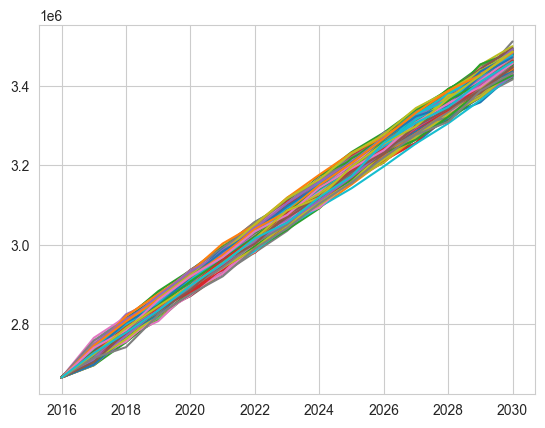

In [214]:
fig, ax = plt.subplots()
(ev_forecast + icev_forecast).plot(ax=ax, legend=False)

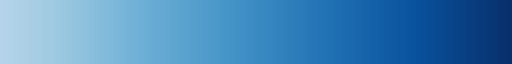

In [215]:
import matplotlib.colors as colors

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

cmap = plt.colormaps['Blues']
new_cmap = truncate_colormap(cmap, 0.3, 1)
new_cmap

In [216]:
NUM_COLORS = 20
cm = plt.get_cmap('Paired')
colors = [new_cmap(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

In [217]:
def plot_probabilistic_vehicle_forecasts(df, historical_df, vehicle_type):
    
    fig, ax = plt.subplots(figsize=(8,4))

    ax.fill_between(
        x=df.index.values, 
        y1=df.quantile(0.025, axis=1).values, 
        y2=df.quantile(0.975, axis=1).values, 
        color=colors[19],
        alpha=0.3,
        label='95% CI'
    )

    ax.fill_between(
        x=df.index.values, 
        y1=df.quantile(0.25, axis=1).values, 
        y2=df.quantile(0.75, axis=1).values, 
        color=colors[19],
        alpha=0.5,
        label='IQR'
    )

    ax.plot(
        df.index.values, 
        df.quantile(0.5, axis=1).values, 
        linewidth=1, 
        c='navy', 
        label='Median'
    )

    ax.plot(
        np.arange(historical_df.index[0], t_max+1),
        historical_df.loc[:t_max].values,
        linewidth=2,
        c='green',
        label='Historical Training Data'
    )

    ax.plot(
        historical_df.index,
        historical_df.values,
        linewidth=2,
        c='green',
        label='Historical Test Data',
        linestyle='--'
    )

    handles, labels = ax.get_legend_handles_labels()
    ax.legend(
        handles, 
        labels, 
        # bbox_to_anchor=(1, 0.9), 
        title='Percentile', 
        title_fontsize=16, 
        fontsize=10
    )
    ax.set_title('Forecasted number of {}s for Norway'.format(vehicle_type))
    ax.set_ylabel('Number of Registered Vehicles', fontsize=12)
    ax.set_xlabel('Time (Years)', fontsize=12)
    ax.set_ylim(0, 1.2*df.max().max())
    plt.show()

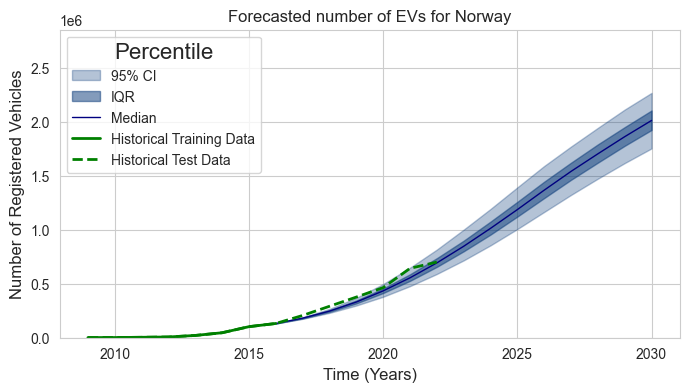

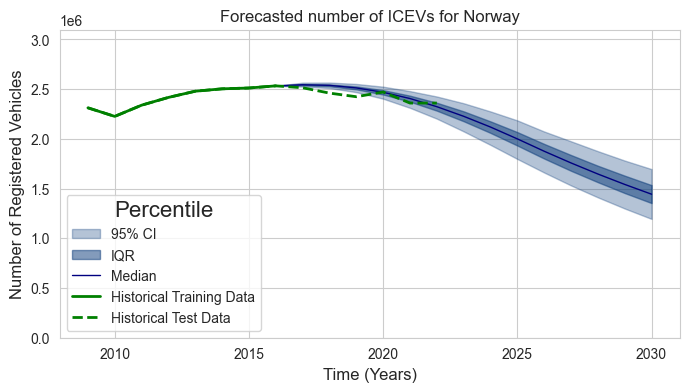

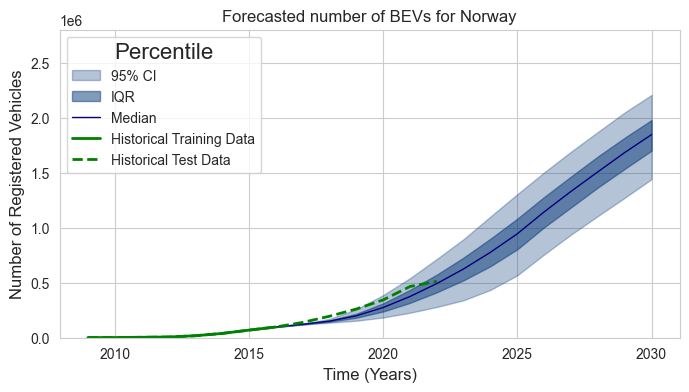

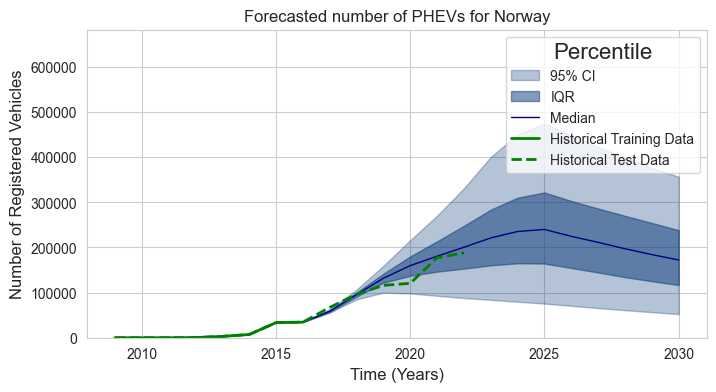

In [218]:
plot_probabilistic_vehicle_forecasts(ev_forecast, df['EV_Fleet'], 'EV')
plot_probabilistic_vehicle_forecasts(icev_forecast, df['ICEV_Stock'], 'ICEV')
plot_probabilistic_vehicle_forecasts(bev_forecast, df['BEV_Stock'], 'BEV')
plot_probabilistic_vehicle_forecasts(phev_forecast, df['PHEV_Stock'], 'PHEV')

# Explore the Effects of my Two New Parameters: Growth and reg-ret weighting

In [263]:
g=10
historical_vehicles = df.loc[:t_max, 'Total_Stock']
historical_vehicles[future_date] = historical_vehicles[t_max] * g

historical_vehicles_gp = train_stock_gp(
    historical_vehicles, 
    t_max, 
    future_date
)

X = np.arange(t_max, future_date+1, 1).reshape(-1,1)

# mean_stock_prediction, std_prediction = historical_vehicles_gp.predict(X, return_std=True)
stock_prediction_df = pd.DataFrame(
    index=np.arange(t_max, future_date+1), 
    columns=range(0, n_sim), 
    data=historical_vehicles_gp.sample_y(X, n_samples=n_sim)
)

# difference = np.diff(mean_stock_prediction, n=1)/mean_stock_prediction[:-1]
difference_df = stock_prediction_df.diff(1).shift(-1).div(stock_prediction_df).head(-1)

# r_reg_baseline = np.random.choice(posterior_predictive.posterior_predictive.counts_observed.values.flatten(), size=(future_date-t_max, n_sim))

# r_reg_df = pd.DataFrame(index=np.arange(t_max, future_date), columns=range(0, n_sim), data=r_reg_baseline)
# r_ret_df = pd.DataFrame(index=np.arange(t_max, future_date), columns=range(0, n_sim), data=r_reg_baseline)

r_reg_df = r_reg_baseline_df
r_ret_df = r_reg_baseline_df

w = np.random.rand(n_sim) # Use random weights instead of deterministic ones

r_ret_df = r_reg_df.sub((1-w)*difference_df, axis=0)
r_reg_df = r_reg_df.add(w*difference_df, axis=0).sub(r_ret_df[r_ret_df < 0].fillna(0)) # Make up for difference in registration rates

r_ret_df[r_ret_df < 0] = 0

r_ret_df

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2016,0.052588,0.042801,0.051332,0.057353,0.049852,0.036999,0.061533,0.040426,0.052278,0.053970,...,0.043002,0.031771,0.031749,0.054290,0.036036,0.032176,0.016350,0.038801,0.042880,0.037368
2017,0.044024,0.033329,0.034421,0.042299,0.031860,0.004789,0.054972,0.030720,0.045146,0.044836,...,0.009955,0.011137,0.002405,0.054655,0.017294,0.007105,0.000000,0.042747,0.041635,0.020828
2018,0.010394,0.000000,0.014545,0.031314,0.017779,0.000000,0.050671,0.008153,0.033065,0.030691,...,0.000000,0.000000,0.000000,0.040523,0.000000,0.000000,0.000000,0.004353,0.026537,0.000000
2019,0.000000,0.000000,0.000000,0.020238,0.000991,0.000000,0.042763,0.000000,0.022044,0.005232,...,0.000000,0.000000,0.000000,0.024789,0.000000,0.000000,0.000000,0.000000,0.017193,0.000000
2020,0.000000,0.000000,0.000000,0.014343,0.000000,0.000000,0.036904,0.000000,0.013356,0.000000,...,0.000000,0.000000,0.000000,0.002593,0.000000,0.000000,0.000000,0.000000,0.009286,0.000000
2021,0.000000,0.000000,0.000000,0.013580,0.000000,0.000000,0.035627,0.000000,0.008334,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003253,0.000000
2022,0.000000,0.000000,0.000000,0.014482,0.000000,0.000000,0.034075,0.000000,0.006698,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2023,0.000000,0.000000,0.000000,0.017906,0.000000,0.000000,0.035043,0.000000,0.008731,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001776,0.000000
2024,0.000000,0.000000,0.000000,0.020386,0.000217,0.000000,0.035780,0.000000,0.009738,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007441,0.000000
2025,0.000000,0.000000,0.000000,0.024521,0.006938,0.000000,0.039098,0.000000,0.014566,0.000000,...,0.000000,0.003257,0.000000,0.003300,0.000000,0.000000,0.000000,0.000000,0.013703,0.000000


<Axes: >

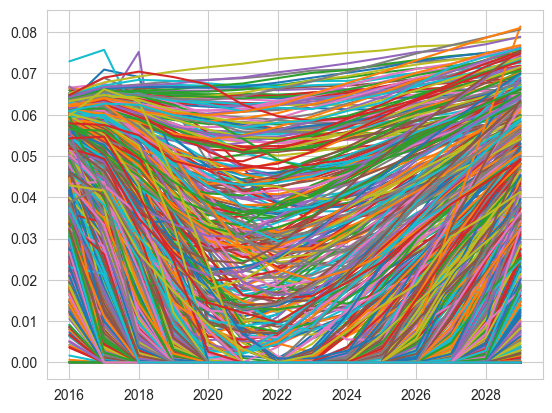

In [264]:
r_ret_df.plot(legend=False)

<Axes: >

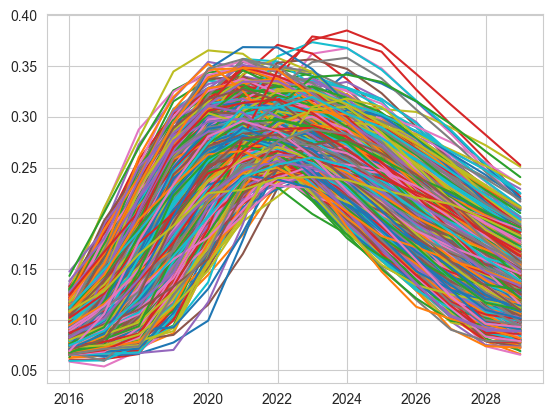

In [265]:
r_reg_df.plot(legend=False)

In [282]:
def forecast_vehicles(g):

    historical_vehicles = df.loc[:t_max, 'Total_Stock']
    historical_vehicles[future_date] = historical_vehicles[t_max] * g

    historical_vehicles_gp = train_stock_gp(
        historical_vehicles, 
        t_max, 
        future_date
    )

    X = np.arange(t_max, future_date+1, 1).reshape(-1,1)

    # mean_stock_prediction, std_prediction = historical_vehicles_gp.predict(X, return_std=True)
    stock_prediction_df = pd.DataFrame(
        index=np.arange(t_max, future_date+1), 
        columns=range(0, n_sim), 
        data=historical_vehicles_gp.sample_y(X, n_samples=n_sim)
    )

    # difference = np.diff(mean_stock_prediction, n=1)/mean_stock_prediction[:-1]
    difference_df = stock_prediction_df.diff(1).shift(-1).div(stock_prediction_df).head(-1)

    # r_reg_baseline = np.random.choice(posterior_predictive.posterior_predictive.counts_observed.values.flatten(), size=(future_date-t_max, n_sim))

    # r_reg_df = pd.DataFrame(index=np.arange(t_max, future_date), columns=range(0, n_sim), data=r_reg_baseline)
    # r_ret_df = pd.DataFrame(index=np.arange(t_max, future_date), columns=range(0, n_sim), data=r_reg_baseline)

    r_reg_df = r_reg_baseline_df
    r_ret_df = r_reg_baseline_df

    w = np.random.rand(n_sim) # Use random weights instead of deterministic ones

    r_ret_df = r_reg_df.sub((1-w)*difference_df, axis=0)
    r_reg_df = r_reg_df.add(w*difference_df, axis=0).sub(r_ret_df[r_ret_df < 0].fillna(0)) # Make up for difference in registration rates
    
    r_ret_df[r_ret_df < 0] = 0 # To prevent negative retirement rates
    
    # r_reg_df.values.sort(axis=1)
    # r_ret_df.values.sort(axis=1)

    # Creates a range of numeric dates between t0 and t1 at a given sample rate
    forecast_dates = np.arange(t_max, future_date+1)

    # Create dataframes that contain a column for each simulation and a row for each forecasted date
    ev_forecast= pd.DataFrame(index=forecast_dates, columns=range(0, n_sim), dtype=float)
    icev_forecast = pd.DataFrame(index=forecast_dates, columns=range(0, n_sim), dtype=float)
    bev_forecast= pd.DataFrame(index=forecast_dates, columns=range(0, n_sim), dtype=float)
    phev_forecast = pd.DataFrame(index=forecast_dates, columns=range(0, n_sim), dtype=float)

    # Populate forecast with inital starting registrations
    ev_forecast.iloc[0] = df.loc[t_max, 'EV_Fleet']
    icev_forecast.iloc[0] = df.loc[t_max, 'ICEV_Stock']
    bev_forecast.iloc[0] = df.loc[t_max, 'BEV_Stock']
    phev_forecast.iloc[0] = df.loc[t_max, 'PHEV_Stock']

    # Making the forecasts by adding new registrations and removing retired vehicles
    for t in range(t_max+1, future_date+1):
        new_vehicles = r_reg_df.loc[t-1] * (ev_forecast.loc[t-1] + icev_forecast.loc[t-1])

        new_evs = ev_share_gp_samples.loc[t-1] * new_vehicles
        new_icevs = icev_share_gp_samples.loc[t-1] * new_vehicles
        new_bevs = bev_share_gp_samples.loc[t-1] * new_evs
        new_phevs = phev_share_gp_samples.loc[t-1] * new_evs

        # if t > icev_ban:
        #     new_icevs = 0 * new_vehicles
        
        # if t > phev_ban:
        #     new_phevs = 0 * new_vehicles

        retired_evs = r_ret_df.loc[t-1] * ev_forecast.loc[t-1]
        retired_icevs = r_ret_df.loc[t-1] * icev_forecast.loc[t-1]
        retired_bevs = r_ret_df.loc[t-1] * bev_forecast.loc[t-1]
        retired_phevs = r_ret_df.loc[t-1] * phev_forecast.loc[t-1]

        ev_forecast.loc[t] = ev_forecast.loc[t-1] + new_evs - retired_evs
        icev_forecast.loc[t] = icev_forecast.loc[t-1] + new_icevs - retired_icevs
        bev_forecast.loc[t] = bev_forecast.loc[t-1] + new_bevs - retired_bevs
        phev_forecast.loc[t] = phev_forecast.loc[t-1] + new_phevs - retired_phevs 

    return ev_forecast, icev_forecast, bev_forecast, phev_forecast

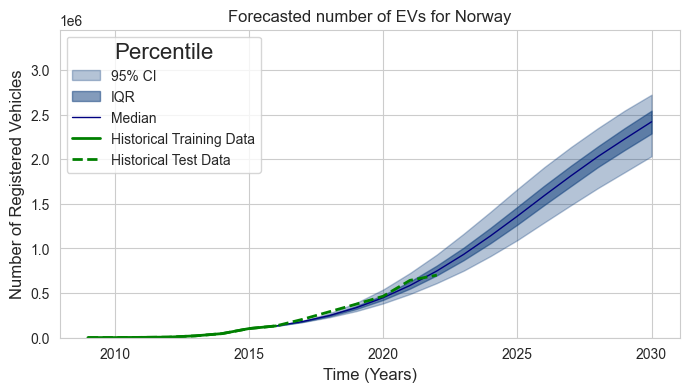

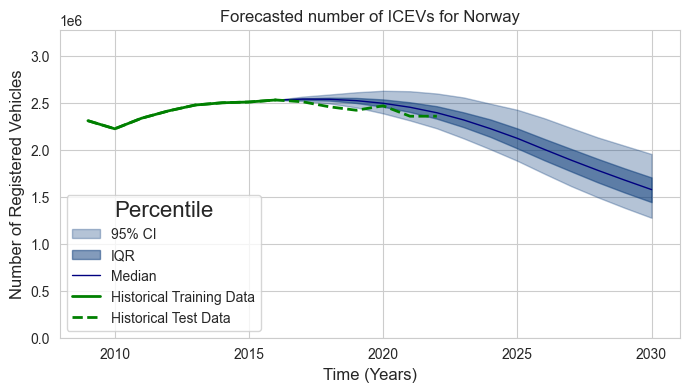

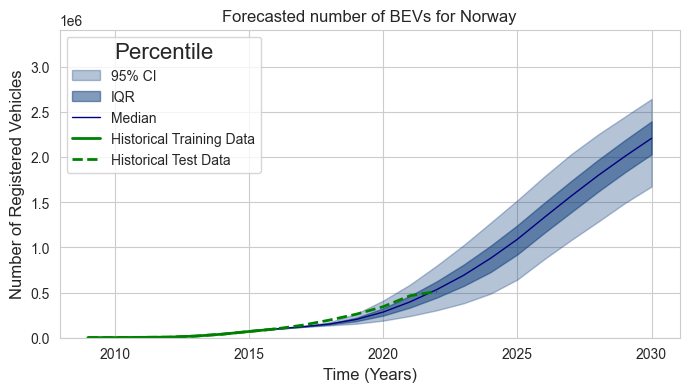

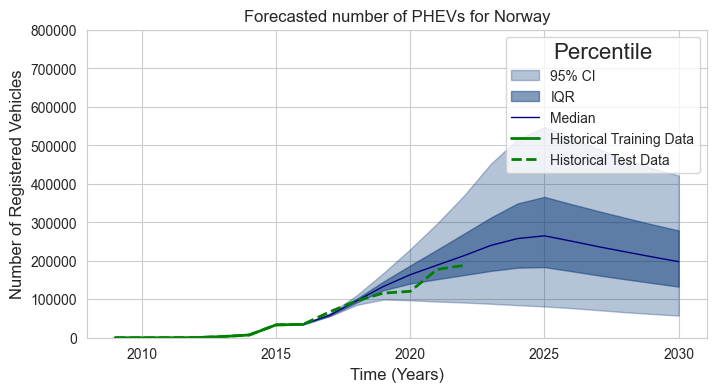

In [287]:
ev_forecast, icev_forecast, bev_forecast, phev_forecast = forecast_vehicles(g=1.5)
plot_probabilistic_vehicle_forecasts(ev_forecast, df['EV_Fleet'], 'EV')
plot_probabilistic_vehicle_forecasts(icev_forecast, df['ICEV_Stock'], 'ICEV')
plot_probabilistic_vehicle_forecasts(bev_forecast, df['BEV_Stock'], 'BEV')
plot_probabilistic_vehicle_forecasts(phev_forecast, df['PHEV_Stock'], 'PHEV')